In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

#### 장기간 체감온도 

In [2]:
pt_1 = pd.read_csv('체감온도_lt_1.csv',encoding = 'utf-8')
pt_2 = pd.read_csv('체감온도_lt_2.csv',encoding = 'utf-8')
pt_3 = pd.read_csv('체감온도_lt_3.csv',encoding = 'utf-8')

In [3]:
pt_ = pd.concat([pt_1,pt_2,pt_3],axis = 0)

In [4]:
date = pt_.iloc[:,0]
temp = pt_.iloc[:,1]
humid = pt_.iloc[:,2]
pt_0 = pt_.iloc[:,3]

In [5]:
pt = pd.DataFrame()
pt['date'] = date
pt['humid'] = humid
pt['temp'] = temp
pt['p_temp'] = pt_0

In [7]:
pt[['year','month','day']] = pt['date'].str.split('-',expand = True)

In [8]:
pt

,date,humid,temp,p_temp,year,month,day
0,1995-08-13,79.0,29.8,32.3,1995,08,13
1,1995-08-14,64.0,33.0,34.3,1995,08,14
2,1995-08-15,53.0,33.6,33.9,1995,08,15
3,1995-08-16,61.0,31.9,33.0,1995,08,16
4,1995-08-17,53.0,31.6,31.9,1995,08,17
...,...,...,...,...,...,...,...
1250,2023-09-06,52.3,31.8,31.5,2023,09,06
1251,2023-09-07,39.8,31.6,30.0,2023,09,07
1252,2023-09-08,47.3,30.4,29.7,2023,09,08
1253,2023-09-09,50.7,31.0,30.6,2023,09,09


#### 장기간 기온 
- 어느날 하루 정해서 상승을 보여야 함 

In [27]:
temp_df = pd.read_csv('temp_longterm.csv')

In [28]:
t_long = pd.DataFrame()
date = temp_df.iloc[:,0]
low = temp_df.iloc[:,2]
mean = temp_df.iloc[:,3]
high = temp_df.iloc[:,4]

t_long['date'] = date 
t_long['low'] = low
t_long['mean'] = mean
t_long['high'] = high

In [29]:
t_long[['year','month','day']] = t_long['date'].str.split('-',expand = True);t_long.head()

,date,low,mean,high,year,month,day
0,1995-08-13,27.6,25.3,30.4,1995,08,13
1,1995-08-14,29.3,26.7,33.5,1995,08,14
2,1995-08-15,29.1,26.4,33.7,1995,08,15
3,1995-08-16,28.0,24.4,32.3,1995,08,16
4,1995-08-17,28.3,25.4,31.8,1995,08,17


In [30]:
#t_long.iloc[-1,:]
t_long.drop([10256,10257], axis=0, inplace = True)

In [31]:
s_temp = t_long.query('month == "06" | month == "07" | month == "08"')

In [32]:
s_ptemp = pt.query('month == "06" | month == "07" | month == "08"') 

In [33]:
summer_df = pd.merge(s_temp,s_ptemp,on=['date','year','month','day'])

In [34]:
summer_df = summer_df.drop('date',axis=1)

In [35]:
summer_df.head()

,low,mean,high,year,month,day,humid,temp,p_temp
0,27.6,25.3,30.4,1995,08,13,79.0,29.8,32.3
1,29.3,26.7,33.5,1995,08,14,64.0,33.0,34.3
2,29.1,26.4,33.7,1995,08,15,53.0,33.6,33.9
3,28.0,24.4,32.3,1995,08,16,61.0,31.9,33.0
4,28.3,25.4,31.8,1995,08,17,53.0,31.6,31.9


In [41]:
df = df[8:]

C:\Users\user\AppData\Local\Temp\ipykernel_6808\3184234308.py:18: UserWarning: Glyph 12631 (\N{HANGUL LETTER O}) missing from current font.
  plt.savefig('체감온도.png')
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12631 (\N{HANGUL LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


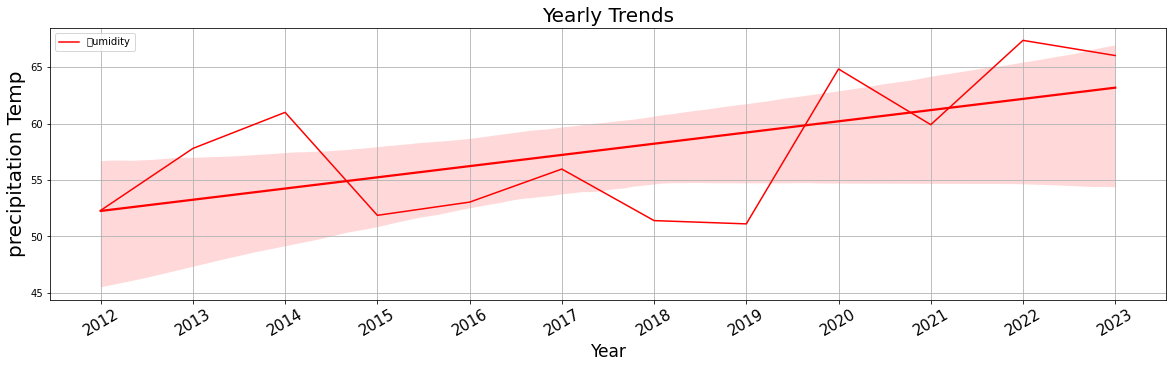

In [44]:
#시각화 

df = summer_df.groupby('year')[['mean','p_temp','humid']].agg('mean').iloc[8:,:].reset_index()
df = df.rename({'mean':'summer_temp'},axis=1)
df = df[9:]

plt.figure(figsize=(20, 5))
sns.lineplot(x='year', y='humid', data=df, label='ㅗumidity', color = 'Red')
sns.regplot(x=np.arange(len(df)), y='humid', data=df, scatter=False, ax=plt.gca(), color = 'Red')


plt.title('Yearly Trends',fontsize=20)
plt.xlabel('Year',fontsize=17)
plt.xticks(fontsize = 15 , rotation = 30)
plt.ylabel('precipitation Temp',fontsize=20)
plt.legend()
plt.grid(True)
plt.savefig('체감온도.png')
plt.show()

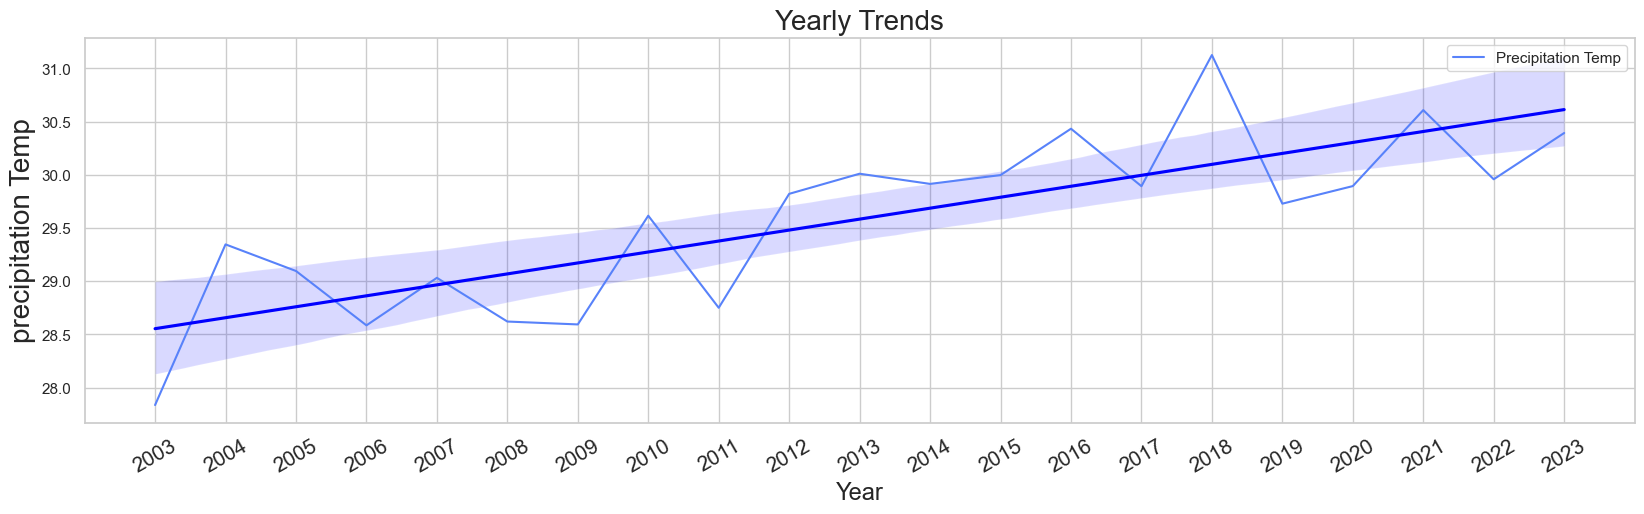

In [133]:
#시각화 

df = summer_df.groupby('year')[['mean','p_temp','humid']].agg('mean').iloc[8:,:].reset_index()
df = df.rename({'mean':'summer_temp'},axis=1)

plt.figure(figsize=(20, 5))
sns.lineplot(x='year', y='p_temp', data=df, label='Precipitation Temp', color = '#5882FA')
sns.regplot(x=np.arange(len(df)), y='p_temp', data=df, scatter=False, ax=plt.gca(), color = 'blue')


plt.title('Yearly Trends',fontsize=20)
plt.xlabel('Year',fontsize=17)
plt.xticks(fontsize = 15 , rotation = 30)
plt.ylabel('precipitation Temp',fontsize=20)
plt.legend()
plt.grid(True)
plt.savefig('체감온도.png')
plt.show()

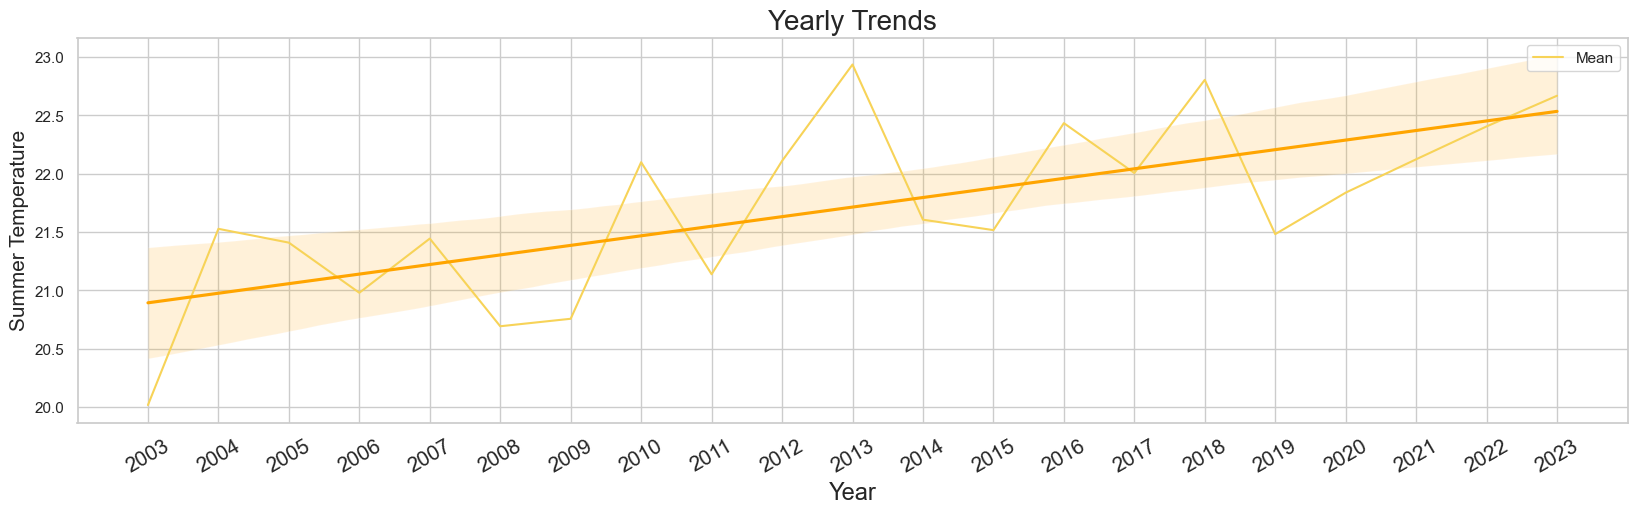

In [132]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year', y='summer_temp', data=df, label='Mean', color = '#F7D358')
sns.regplot(x=np.arange(len(df)), y='summer_temp', data=df, scatter=False, ax=plt.gca(), color = 'orange')

plt.title('Yearly Trends',fontsize=20)
plt.xlabel('Year',fontsize=17)
plt.xticks(fontsize = 15 , rotation = 30)
plt.ylabel('Summer Temperature',fontsize=15)
plt.legend()
plt.grid(True)
plt.savefig('실제기온.png')
plt.show()

In [69]:
df

,year,mean,p_temp,humid
0,2010,25.4,30.1,60.2
1,2011,26.8,31.5,59.7
2,2012,24.2,28.7,61.4
3,2013,27.6,32.2,58.9
4,2014,26.1,30.8,60.5


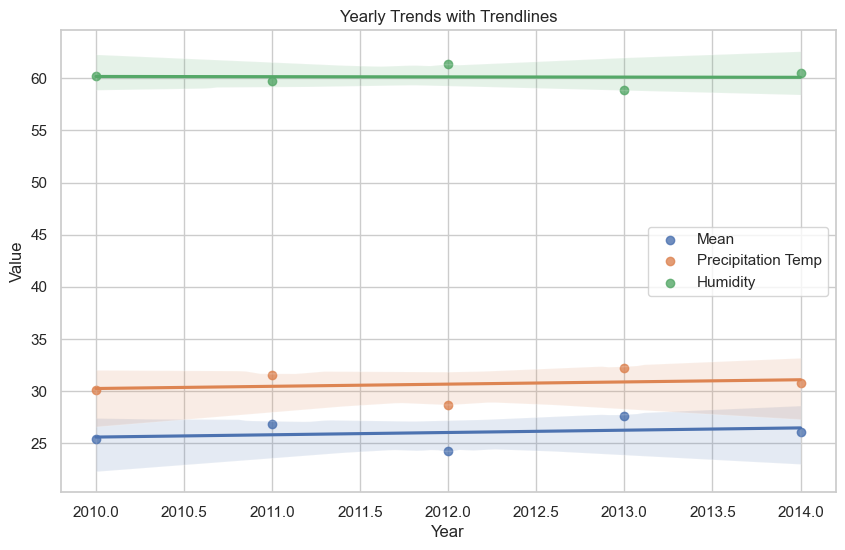

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 생성
# summer_df.groupby('year')[['mean','p_temp','humid']].agg('mean') 결과를 대체해주세요
data = {
    'year': [2010, 2011, 2012, 2013, 2014],
    'mean': [25.4, 26.8, 24.2, 27.6, 26.1],
    'p_temp': [30.1, 31.5, 28.7, 32.2, 30.8],
    'humid': [60.2, 59.7, 61.4, 58.9, 60.5]
}

df = pd.DataFrame(data)

# 시각화
plt.figure(figsize=(10, 6))

# 'mean'에 대한 추세선 그리기
sns.regplot(x='year', y='mean', data=df, label='Mean')

# 'p_temp'에 대한 추세선 그리기
sns.regplot(x='year', y='p_temp', data=df, label='Precipitation Temp')

# 'humid'에 대한 추세선 그리기
sns.regplot(x='year', y='humid', data=df, label='Humidity')

plt.title('Yearly Trends with Trendlines')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# -0.2442 + 0.55399Tw + 0.45535Ta – 0.0022Tw2 + 0.00278TwTa + 3.0

In [48]:
df = pd.read_excel('co2_global_monthly_new.xlsx')

In [49]:
df.columns

Index(['년월', '전지구', '안면도', '료리(일본)', '마우나로아(미국)', '케이프그림(호주)'], dtype='object')

In [50]:
df = df.drop(columns = ['안면도', '료리(일본)', '마우나로아(미국)', '케이프그림(호주)'])
df = df.dropna()

In [51]:
df = df.astype({'년월':'object'})

In [52]:
a = []
for i in df['년월']:
    i = str(i)
    date_format = "%Y%m"
    date_datetime = datetime.strptime(i, date_format)
    a.append(date_datetime)
    
df['년월'] = a

In [54]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

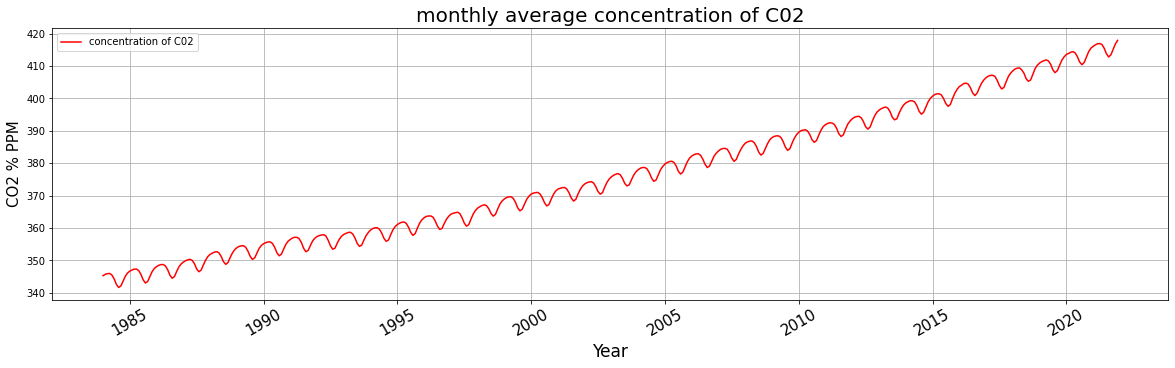

In [66]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='년월', y='전지구', data=df, label='concentration of C02', color = 'red')


plt.title('monthly average concentration of C02',fontsize=20)
plt.xlabel('Year',fontsize=17)
plt.xticks(fontsize = 15 , rotation = 30)
plt.ylabel('CO2 % PPM',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [81]:
import chardet

with open('폭염.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

encoding = result['encoding']

df2 = pd.read_csv('폭염.csv', encoding=encoding)

In [82]:
df2

,연도별,서울(일),강릉(일),대전(일),대구(일),광주(일),부산(일),전국일평균(일)
0,2007,4,13,5.0,23,12,NaN,9.8
1,2008,3,13,3.0,36,18,NaN,12.5
2,2009,4,4,NaN,18,6,NaN,4.2
3,2010,2,19,10.0,41,20,3.0,13.9
4,2011,3,8,1.0,29,13,1.0,7.5
5,2012,14,10,17.0,30,25,7.0,15.0
6,2013,2,26,16.0,54,22,13.0,18.5
7,2014,10,9,5.0,22,8,NaN,7.4
8,2015,8,9,12.0,21,14,1.0,10.1
9,2016,24,12,29.0,32,31,9.0,22.4


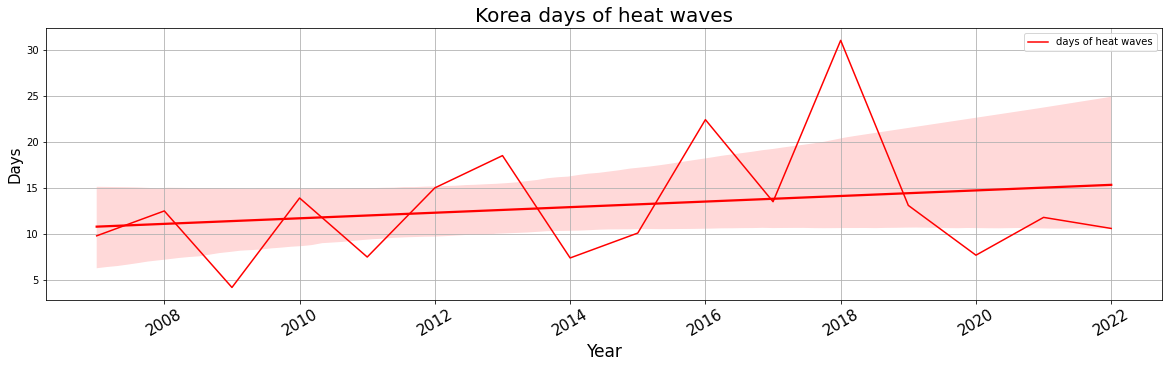

In [87]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='연도별', y='전국일평균(일)', data=df2, label='days of heat waves', color = 'red')
sns.regplot(x='연도별', y='전국일평균(일)', data=df2, scatter=False, ax=plt.gca(), color = 'red')

plt.title('Korea days of heat waves',fontsize=20)
plt.xlabel('Year',fontsize=17)
plt.xticks(fontsize = 15 , rotation = 30)
plt.ylabel('Days',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()